# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [4]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [5]:
pokemon = pd.DataFrame(raw_data)
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [6]:
#method :- 1
pokemon[pokemon.columns[[0,2,3,1,4]]]

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [7]:
#method :- 2
pokemon[['name', 'type','hp', 'evolution','pokedex']]

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [8]:
pokemon['place']=['Agra', 'Mathura', 'Hathras', 'Baldev']
pokemon

,name,evolution,type,hp,pokedex,place
0,Bulbasaur,Ivysaur,grass,45,yes,Agra
1,Charmander,Charmeleon,fire,39,no,Mathura
2,Squirtle,Wartortle,water,44,yes,Hathras
3,Caterpie,Metapod,bug,45,no,Baldev


### 6. Display the data type of each column

In [9]:
pokemon.dtypes

name         object
evolution    object
type         object
hp            int64
pokedex      object
place        object
dtype: object

### 7. Display the info of dataframe

In [10]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   evolution  4 non-null      object
 2   type       4 non-null      object
 3   hp         4 non-null      int64 
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [11]:
wine=open("wine.txt", "r")
print(wine.read())
#wine.close()

1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045
1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510
1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280
1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320
1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150
1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547
1,13.63,1.81,2.7,17.2,112,2.85,2.91,.3,1.46,7.3,1.28,2.88,131

### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [12]:
wine_df = pd.read_csv('wine.txt',header=None)
wine_df1=wine_df.drop(columns=[0,3,6,8,10,12,13])
print(wine_df1)


        1     2     4    5     7     9     11
0    14.23  1.71  15.6  127  3.06  2.29  1.04
1    13.20  1.78  11.2  100  2.76  1.28  1.05
2    13.16  2.36  18.6  101  3.24  2.81  1.03
3    14.37  1.95  16.8  113  3.49  2.18  0.86
4    13.24  2.59  21.0  118  2.69  1.82  1.04
..     ...   ...   ...  ...   ...   ...   ...
173  13.71  5.65  20.5   95  0.61  1.06  0.64
174  13.40  3.91  23.0  102  0.75  1.41  0.70
175  13.27  4.28  20.0  120  0.69  1.35  0.59
176  13.17  2.59  20.0  120  0.68  1.46  0.60
177  14.13  4.10  24.5   96  0.76  1.35  0.61

[178 rows x 7 columns]


### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [13]:
wine_df=wine_df1.rename(columns={1:"alcohol",2:'malic_acid',4:'alcalinity_of_ash',5:'magnesium',7:'flavanoids',9:'proanthocyanins',11:'hue'})
print(wine_df)

     alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      14.23        1.71               15.6        127        3.06   
1      13.20        1.78               11.2        100        2.76   
2      13.16        2.36               18.6        101        3.24   
3      14.37        1.95               16.8        113        3.49   
4      13.24        2.59               21.0        118        2.69   
..       ...         ...                ...        ...         ...   
173    13.71        5.65               20.5         95        0.61   
174    13.40        3.91               23.0        102        0.75   
175    13.27        4.28               20.0        120        0.69   
176    13.17        2.59               20.0        120        0.68   
177    14.13        4.10               24.5         96        0.76   

     proanthocyanins   hue  
0               2.29  1.04  
1               1.28  1.05  
2               2.81  1.03  
3               2.18  0.86  
4             

### 11. Set the values of the first 3 values from alcohol column as NaN

In [14]:
wine_df.iloc[0:3,0:1]=np.nan
wine_df

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [15]:
wine_df.iloc[2:4,3]=np.nan
wine_df

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,NaN,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [16]:
#wine_df[wine_df.alcohol=="NaN"].iloc[0:3, 0]
wine_df.alcohol.replace(np.nan,10,inplace=True)
wine_df.magnesium.replace(np.nan,100,inplace=True)
wine_df


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,100.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,118.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 14. Count the number of missing values in all columns.

In [17]:
wine_df.isna().sum()
#we can also use:- details.isnull().sum())

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [18]:
a1 = np.random.randint(1,10,10)
print(a1)

[8 7 9 1 3 6 8 5 8 1]


### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [19]:
wine_df.iloc[a1,0]=np.nan

print(wine_df)


     alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      10.00        1.71               15.6      127.0        3.06   
1        NaN        1.78               11.2      100.0        2.76   
2      10.00        2.36               18.6      100.0        3.24   
3        NaN        1.95               16.8      100.0        3.49   
4      13.24        2.59               21.0      118.0        2.69   
..       ...         ...                ...        ...         ...   
173    13.71        5.65               20.5       95.0        0.61   
174    13.40        3.91               23.0      102.0        0.75   
175    13.27        4.28               20.0      120.0        0.69   
176    13.17        2.59               20.0      120.0        0.68   
177    14.13        4.10               24.5       96.0        0.76   

     proanthocyanins   hue  
0               2.29  1.04  
1               1.28  1.05  
2               2.81  1.03  
3               2.18  0.86  
4             

### 17.  How many missing values do we have now?

In [20]:
wine_df.isnull().sum().sum()

7

### 18. Print only the non-null values in alcohol

In [21]:
print(wine_df.dropna())

     alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      10.00        1.71               15.6      127.0        3.06   
2      10.00        2.36               18.6      100.0        3.24   
4      13.24        2.59               21.0      118.0        2.69   
10     14.10        2.16               18.0      105.0        3.32   
11     14.12        1.48               16.8       95.0        2.43   
..       ...         ...                ...        ...         ...   
173    13.71        5.65               20.5       95.0        0.61   
174    13.40        3.91               23.0      102.0        0.75   
175    13.27        4.28               20.0      120.0        0.69   
176    13.17        2.59               20.0      120.0        0.68   
177    14.13        4.10               24.5       96.0        0.76   

     proanthocyanins   hue  
0               2.29  1.04  
2               2.81  1.03  
4               1.82  1.04  
10              2.38  1.25  
11            

### 19. Delete the rows that contain missing values

In [22]:
wine_df=wine_df.dropna(axis=1)
wine_df

,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,1.71,15.6,127.0,3.06,2.29,1.04
1,1.78,11.2,100.0,2.76,1.28,1.05
2,2.36,18.6,100.0,3.24,2.81,1.03
3,1.95,16.8,100.0,3.49,2.18,0.86
4,2.59,21.0,118.0,2.69,1.82,1.04
...,...,...,...,...,...,...
173,5.65,20.5,95.0,0.61,1.06,0.64
174,3.91,23.0,102.0,0.75,1.41,0.70
175,4.28,20.0,120.0,0.69,1.35,0.59
176,2.59,20.0,120.0,0.68,1.46,0.60


### 20.  Reset the index, so it starts with 0 again

In [23]:
wine_df.reset_index()

,index,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,0,1.71,15.6,127.0,3.06,2.29,1.04
1,1,1.78,11.2,100.0,2.76,1.28,1.05
2,2,2.36,18.6,100.0,3.24,2.81,1.03
3,3,1.95,16.8,100.0,3.49,2.18,0.86
4,4,2.59,21.0,118.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,173,5.65,20.5,95.0,0.61,1.06,0.64
174,174,3.91,23.0,102.0,0.75,1.41,0.70
175,175,4.28,20.0,120.0,0.69,1.35,0.59
176,176,2.59,20.0,120.0,0.68,1.46,0.60


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [24]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url,sep='\t', header=0)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [25]:
chipo["price"]=chipo.item_price.apply(lambda x: x.replace('$',''))
chipo["price"]=pd.to_numeric(chipo.price)
a1=chipo[chipo.price > 10.00]
a1.pivot_table(index='item_name',values='quantity',aggfunc='count').count()

quantity    31
dtype: int64

### 22. Print the Chipo Dataframe & info about data frame

In [26]:
chipo.info()
display(chipo)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   price               4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [319]:
a1=chipo[["item_name","price"]].drop_duplicates(subset ="item_name").sort_values(by=['price'],ignore_index = True)
print(a1)

                                item_name  price
0                           Bottled Water   1.09
1                       Canned Soft Drink   1.25
2                           Side of Chips   1.69
3                                   Chips   2.15
4                             Canned Soda   2.18
5            Chips and Fresh Tomato Salsa   2.39
6   Chips and Tomatillo-Green Chili Salsa   2.39
7     Chips and Tomatillo-Red Chili Salsa   2.39
8      Chips and Roasted Chili-Corn Salsa   2.39
9      Chips and Roasted Chili Corn Salsa   2.95
10  Chips and Tomatillo Green Chili Salsa   2.95
11    Chips and Tomatillo Red Chili Salsa   2.95
12      Chips and Mild Fresh Tomato Salsa   3.00
13                       Nantucket Nectar   3.39
14                                   Izze   3.39
15                    Chips and Guacamole   4.45
16                      6 Pack Soft Drink   6.49
17                           Crispy Tacos   7.40
18                                Burrito   7.40
19                  

### 24. Sort by the name of the item

In [28]:
b1=a1.sort_values(by=['item_name']).reset_index()
b1[["item_name","price"]]

,item_name,price
0,6 Pack Soft Drink,6.49
1,Barbacoa Bowl,11.75
2,Barbacoa Burrito,8.99
3,Barbacoa Crispy Tacos,11.75
4,Barbacoa Salad Bowl,11.89
5,Barbacoa Soft Tacos,9.25
6,Bottled Water,1.09
7,Bowl,22.20
8,Burrito,7.40
9,Canned Soda,2.18


### 25. What was the quantity of the most expensive item ordered?

In [104]:
#after shorting the dataframe we have extracted the most expensive item :-
a1=b1.tail(1).iloc[ 0:1,2:3]
#converion from dataframe to list
c1=a1.values
#access the listitem and used for comparison:- 
chipo[chipo.item_name==c1[0][0]].quantity.sum()

8

### 26. How many times were a Veggie Salad Bowl ordered?

In [123]:
chipo[chipo.item_name=="Veggie Salad Bowl"].quantity.sum()

18

### 27. How many times people orderd more than one Canned Soda?

In [127]:
chipo[((chipo.item_name=="Canned Soda") & (chipo.quantity >1 ) )].item_name.count()

20

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [141]:
user=pd.read_csv("occupation.csv",sep='|')


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### 29. Discover what is the mean age per occupation

In [142]:
user.pivot_table(index='occupation',values='age',aggfunc='mean')


,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [192]:
#method 1:- using np.where()

m_ratio=user.pivot_table(index='occupation',columns='gender',values='age',aggfunc='count').fillna(0)
#m_ration.where(m_ration.M>0,m_ration.M,[m_ratio.M/(m_ratio.M+m_ratio.F)*100])
m_ratio['male ratio']=np.where(m_ration.M>0, m_ratio.M/(m_ratio.M+m_ratio.F)*100 , "0")
m_ratio

gender,F,M,male ratio
occupation,,,
administrator,36.0,43.0,54.43037974683544
artist,13.0,15.0,53.57142857142857
doctor,0.0,7.0,100.0
educator,26.0,69.0,72.63157894736842
engineer,2.0,65.0,97.01492537313433
entertainment,2.0,16.0,88.88888888888889
executive,3.0,29.0,90.625
healthcare,11.0,5.0,31.25
homemaker,6.0,1.0,14.285714285714285


In [193]:
#:- method 2: - 
m_ratio=user.pivot_table(index='occupation',columns='gender',values='age',aggfunc='count').fillna(0)
m_ratio["male ratio"]=m_ratio.M/(m_ratio.M+m_ratio.F)*100
m_ratio

gender,F,M,male ratio
occupation,,,
administrator,36.0,43.0,54.430380
artist,13.0,15.0,53.571429
doctor,0.0,7.0,100.000000
educator,26.0,69.0,72.631579
engineer,2.0,65.0,97.014925
entertainment,2.0,16.0,88.888889
executive,3.0,29.0,90.625000
healthcare,11.0,5.0,31.250000
homemaker,6.0,1.0,14.285714


### 31. For each occupation, calculate the minimum and maximum ages

In [194]:
user.pivot_table(index='occupation',values='age',aggfunc=(["min","max"]))

,min,max
,age,age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62


### 32. For each combination of occupation and gender, calculate the mean age

In [195]:
#Method 1:- 
user.pivot_table(index='occupation',columns='gender',values='age',aggfunc='mean').fillna(0)


gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,0.000000,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


In [197]:
#Methos 2 :-
user.pivot_table(index=(['occupation','gender']),values='age',aggfunc='mean')


age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

### 33.  For each occupation present the percentage of women and men

In [204]:
m_f_percentage=user.pivot_table(index='occupation',columns='gender',values='age',aggfunc='count').fillna(0)
m_f_percentage["men percentage"]=round(m_f_percentage.M/(m_f_percentage.M+m_f_percentage.F)*100,2)
m_f_percentage["women percentage"]=round(m_f_percentage.F/(m_f_percentage.M+m_f_percentage.F)*100,2)
m_f_percentage

gender,F,M,men percentage,women percentage
occupation,,,,
administrator,36.0,43.0,54.43,45.57
artist,13.0,15.0,53.57,46.43
doctor,0.0,7.0,100.00,0.00
educator,26.0,69.0,72.63,27.37
engineer,2.0,65.0,97.01,2.99
entertainment,2.0,16.0,88.89,11.11
executive,3.0,29.0,90.62,9.38
healthcare,11.0,5.0,31.25,68.75
homemaker,6.0,1.0,14.29,85.71


## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [400]:
student_mat = pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/student-por.csv")
student_por = pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/student-por.csv")
df = student_mat.append(student_por,ignore_index=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1294,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1295,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1296,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [401]:
#df.info() user to findout the column no.:- 
new_df=df.iloc[: ,0:12]
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,MS,F,19,R,GT3,T,2,3,services,other,course,mother
1294,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
1295,MS,F,18,U,GT3,T,1,1,other,other,course,mother
1296,MS,M,17,U,LE3,T,3,1,services,services,course,mother


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [402]:
capitalize = lambda x: x.title()
print(capitalize("at_home" ))

At_Home


### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [419]:
new_df["Fjob"]=new_df.Fjob.apply(lambda x: x.title())
new_df["Mjob"]=new_df.Mjob.apply(lambda x: x.title())
new_df

At_Home
Other


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,At_Home,Teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,At_Home,Other,course,father
2,GP,F,15,U,LE3,T,1,1,At_Home,Other,other,mother
3,GP,F,15,U,GT3,T,4,2,Health,Services,home,mother
4,GP,F,16,U,GT3,T,3,3,Other,Other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,MS,F,19,R,GT3,T,2,3,Services,Other,course,mother
1294,MS,F,18,U,LE3,T,3,1,Teacher,Services,course,mother
1295,MS,F,18,U,GT3,T,1,1,Other,Other,course,mother
1296,MS,M,17,U,LE3,T,3,1,Services,Services,course,mother


### 38. Print the last elements of the data set. (Last few records)

In [247]:
new_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
1293,MS,F,19,R,GT3,T,2,3,services,other,course,mother
1294,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
1295,MS,F,18,U,GT3,T,1,1,other,other,course,mother
1296,MS,M,17,U,LE3,T,3,1,services,services,course,mother
1297,MS,M,18,R,LE3,T,3,2,services,other,course,mother


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

### 41. Multiply every number of the dataset by 10. 

In [266]:
new_df.select_dtypes(include = "int")*10


,age,Medu,Fedu
0,180,40,40
1,170,10,10
2,150,10,10
3,150,40,20
4,160,30,30
...,...,...,...
1293,190,20,30
1294,180,30,10
1295,180,10,10
1296,170,30,10


## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [346]:
cars1 = pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/cars1.csv")
cars2 = pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/cars2.csv")


   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [4]:
#type()
type(cars1)

pandas.core.frame.DataFrame

In [347]:
#head()
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [349]:
#tail()
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [352]:
#columns()
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [8]:
#info()
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [353]:
#dtypes()
cars1.select_dtypes(include = "int")

,cylinders,displacement,weight,model,origin
0,8,307,3504,70,1
1,8,350,3693,70,1
2,8,318,3436,70,1
3,8,304,3433,70,1
4,8,302,3449,70,1
...,...,...,...,...,...
193,6,200,3012,76,1
194,6,232,3085,76,1
195,4,85,2035,76,1
196,4,98,2164,76,1


In [389]:
##index
fruits = ['apple', 'banana', 'cherry']

x = fruits.index("cherry")

print(x)


2


In [356]:
#shape
cars1.shape

(198, 14)

In [359]:
#count()
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [25]:
#size()
np.size(cars1)

2772

In [21]:
#ndim()
np.ndim(cars1)


  

2

In [372]:
#axes
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [373]:
#describe()
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [375]:
#memory_usage()
cars1.memory_usage()

Index            128
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [308]:
cars1.sort_values(by='weight')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
54,35.0,4,72,69,1613,18.0,71,3,datsun 1200,NaN,NaN,NaN,NaN,NaN
144,31.0,4,76,52,1649,16.5,74,3,toyota corona,NaN,NaN,NaN,NaN,NaN
53,31.0,4,71,65,1773,19.0,71,3,toyota corolla 1200,NaN,NaN,NaN,NaN,NaN
181,33.0,4,91,53,1795,17.5,75,3,honda civic cvcc,NaN,NaN,NaN,NaN,NaN
55,27.0,4,97,60,1834,19.0,71,2,volkswagen model 111,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.0,8,455,225,4951,11.0,73,1,buick electra 225 custom,NaN,NaN,NaN,NaN,NaN
90,12.0,8,429,198,4952,11.5,73,1,mercury marquis brougham,NaN,NaN,NaN,NaN,NaN
42,12.0,8,383,180,4955,11.5,71,1,dodge monaco (sw),NaN,NaN,NaN,NaN,NaN
103,11.0,8,400,150,4997,14.0,73,1,chevrolet impala,NaN,NaN,NaN,NaN,NaN


In [311]:
#value_counts()
cars1.horsepower.value_counts()

150    19
100    12
95     10
90      9
88      8
       ..
208     1
54      1
210     1
193     1
152     1
Name: horsepower, Length: 70, dtype: int64

In [3]:
import pandas_profiling
profile = pandas_profiling.Profile_Report(cars1)


### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [33]:
cars1=cars1.dropna(axis=1)
cars1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


### 45. What is the number of observations in each dataset?

In [53]:
print('cars1 :- '+str(cars1.count().sum())+"\ncars2 :- "+str(cars2.count().sum()))

cars1 :- 1782
cars2 :- 1800


### 46. Join cars1 and cars2 into a single DataFrame called cars

In [88]:
cars=cars1.append(cars2,ignore_index=True)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97,52,2130,24.6,82,2,vw pickup
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120,79,2625,18.6,82,1,ford ranger


### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [89]:
owners=np.random.randint(15000,73000,cars.car.count())
owners

array([62779, 18669, 48839, 69175, 61247, 49204, 50482, 67690, 46103,
       54301, 56867, 37801, 72543, 19329, 45871, 45589, 54448, 66946,
       24904, 34157, 38266, 48382, 18061, 67010, 17431, 37706, 17371,
       51348, 19467, 51353, 57147, 66884, 22252, 69247, 43385, 40532,
       68245, 54257, 32015, 67216, 30572, 41671, 53498, 61581, 16318,
       45743, 70366, 53595, 31033, 60152, 65763, 21319, 40710, 19032,
       55904, 52916, 33654, 28621, 58254, 18065, 69555, 15826, 17835,
       46453, 33764, 45001, 46500, 72530, 35007, 47221, 29515, 53397,
       68028, 70901, 45665, 69694, 56944, 56496, 42690, 37800, 47661,
       19191, 16345, 46663, 50640, 56360, 18177, 30986, 68323, 64848,
       24923, 68475, 65641, 69396, 69867, 45253, 19311, 59245, 67321,
       66385, 65305, 54125, 58678, 49948, 26657, 16869, 19830, 35796,
       53503, 43061, 71222, 45631, 27332, 53436, 59318, 53792, 68259,
       56368, 38332, 50304, 21798, 29931, 41926, 21037, 26627, 17741,
       55173, 28694,

### 48. Add the column owners to cars

In [90]:
cars["owners"]=owners
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,62779
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,18669
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,48839
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,69175
4,17.0,8,302,140,3449,10.5,70,1,ford torino,61247
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,82,1,ford mustang gl,49907
394,44.0,4,97,52,2130,24.6,82,2,vw pickup,34550
395,32.0,4,135,84,2295,11.6,82,1,dodge rampage,43088
396,28.0,4,120,79,2625,18.6,82,1,ford ranger,19354


## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [93]:
#a. Current date and time
pd.Timestamp.now()

Timestamp('2022-07-19 04:07:27.677345')

In [ ]:
#b. Current year
pd.Timestamp.now().year

In [95]:
#c. Month of year
pd.Timestamp.now().month

7

In [103]:
#d. Week number of the year
pd.Timestamp.now().week

29

In [35]:
#e. Weekday of the week
pd.Timestamp.now().strftime("%w")

'4'

In [73]:
#f. Day of year
pd.Timestamp.now().dayofyear

201

In [118]:
#g. Day of the month
pd.Timestamp.now().day

19

In [74]:
#h. Day of week
pd.Timestamp.now().dayofweek

2

### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [12]:
a=pd.to_datetime("Jul 1 2014 2:43PM")
print(a)

2014-07-01 14:43:00


### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [13]:
a1=pd.to_datetime("2015-06-22")

b1=a1 - pd.DateOffset(days = 5)
b1.strftime('%Y-%m-%d')


'2015-06-17'

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [8]:
import datetime
print(datetime.datetime.fromtimestamp(int("1284105682")).strftime('%Y-%m-%d %H:%M:%S'))

2010-09-10 13:31:22


### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [120]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
pd.to_datetime(DoB.str[:-2] + '19' + DoB.str[-2:])

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

In [77]:
import datetime
from datetime import datetime

def differ_days(date1, date2):
    a = date1
    b = date2
    return (a-b).days
print()
print(differ_days((datetime(2016,10,12,0,0,0)), datetime(2015,12,10,0,0,0)))
print(differ_days((datetime(2016,10,12,0,0,0)), datetime(2015,12,10,23,59,59)))
print()


307
306



### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [273]:
date1 = "15Dec1989"
pd.to_datetime(date1, format='%d%b%Y').strftime('%A,%d %b %y')


'Friday,15 Dec 89'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [259]:
data = pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/wind.data")

#concatinating the Yr,Moand Dy

data["Date"]=data['Mo'].astype(str)+ "-" +data["Dy"].astype(str)+ "-" +data["Yr"].astype(str)

data.drop(["Yr", "Mo","Dy"], axis = 1, inplace = True)
# shift column 'date' to first position
first_column = data.pop('Date')
  
# insert column using insert(position,column_name,first_column) function
data.insert(0, 'Date', first_column)

data


,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1-1-61,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1-2-61,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1-3-61,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1-4-61,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1-5-61,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,12-27-78,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,12-28-78,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,12-29-78,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,12-30-78,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [260]:

#accept the string format daata type of date
data["Date"]=pd.to_datetime(data["Date"].str[:-2] + '19' + data["Date"].str[-2:])

data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6574 non-null   datetime64[ns]
 1   RPT     6568 non-null   float64       
 2   VAL     6571 non-null   float64       
 3   ROS     6572 non-null   float64       
 4   KIL     6569 non-null   float64       
 5   SHA     6572 non-null   float64       
 6   BIR     6574 non-null   float64       
 7   DUB     6571 non-null   float64       
 8   CLA     6572 non-null   float64       
 9   MUL     6571 non-null   float64       
 10  CLO     6573 non-null   float64       
 11  BEL     6574 non-null   float64       
 12  MAL     6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [262]:
data.isna().sum().sum()

31

### 60. Compute how many non-missing values there are in total.

In [263]:
data.count().sum()

85431

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [264]:
a1=round(data.select_dtypes(include = "float").mean().mean(),2)
print('mean windspeeds over all the locations and all the times :-  '+str(a1))

mean windspeeds over all the locations and all the times :-  10.23


### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [265]:
data.fillna(method='bfill',inplace=True)
d1=data.groupby('Date').min().min()
d2=data.groupby('Date').max().max()
d3=data.groupby('Date').mean().mean()
d4=data.std(axis = 0)
#
data2 = {"min": d1,
        "max": d2,
        "mean":d3,
        "std":d4}
df2 = pd.concat(data2,axis = 1)
loc_stats=df2.dropna(axis=0)

loc_stats


,min,max,mean,std
RPT,0.67,35.80,12.361333,5.616409
VAL,0.21,33.37,10.644635,5.267371
ROS,1.50,33.84,11.660624,5.007692
KIL,0.00,28.46,6.307635,3.605242
SHA,0.13,37.54,10.455131,4.936156
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.796687,4.977256
CLA,0.00,31.08,8.493952,4.499529
MUL,0.00,25.88,8.495373,4.167003
CLO,0.04,28.21,8.707516,4.503637


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [266]:
d1=data.groupby('Date').min().min(axis=1)
d2=data.groupby('Date').max().max(axis=1)
d3=data.groupby('Date').mean().mean(axis=1)
d4=data.std(axis = 1)
data3 = {"min": d1,
        "max": d2,
        "mean":d3}
df3 = pd.concat(data3,axis = 1)
#Series to list conversion:- 
a1 =d4.values.tolist()
#adding the new coulmn in data frame :- 
df3["std"]=a1
df3

C:\Users\DHARME~1.SIN\AppData\Local\Temp/ipykernel_19684/906930588.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d4=data.std(axis = 1)


,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,12.985000,2.680622
1961-01-02,6.50,17.54,11.798333,3.436009
1961-01-03,1.79,18.50,10.820833,4.517993
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [267]:
#creating a new date set after removing the date expect the january 1961 and january 1962
l1=data.drop(data[(pd.to_datetime(data.Date).dt.month != 1) |
                   (pd.to_datetime(data.Date).dt.year != 1962) &
                  (pd.to_datetime(data.Date).dt.year != 1961)].index)


#calculate the average/mean wind speed for the new dataswet:- 
#wa=round(l1.mean(axis=0),2)
wa=round(l1.groupby('Date').mean().mean(),2)


print("average windspeed in January for each location. \n Treat January 1961 and January 1962 both as January.")
print(wa)


average windspeed in January for each location. 
 Treat January 1961 and January 1962 both as January.
RPT    14.77
VAL    12.65
ROS    13.01
KIL     7.64
SHA    11.33
BIR     8.65
DUB    12.70
CLA     9.30
MUL     9.38
CLO    10.80
BEL    15.13
MAL    15.18
dtype: float64


### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [268]:
data["month"]=pd.to_datetime(data.Date).dt.strftime('%m (%B)')
wa=round(data.groupby('month').mean(),2)
print(wa)




                  RPT    VAL    ROS   KIL    SHA   BIR    DUB   CLA   MUL  \
month                                                                       
01 (January)    14.84  12.92  13.30  7.20  11.66  8.05  11.82  9.50  9.54   
02 (February)   13.71  12.11  12.88  6.94  11.55  7.63  11.21  9.34  9.31   
03 (March)      13.14  11.51  12.65  7.27  11.55  7.96  11.31  9.64  9.70   
04 (April)      12.56  10.43  12.20  6.90  10.68  7.44  10.22  8.91  8.93   
05 (May)        11.72  10.14  11.55  6.31  10.22  6.94   8.79  8.45  8.04   
06 (June)       10.45   8.95  10.36  5.65   9.53  6.41   8.01  7.92  7.64   
07 (July)        9.99   8.36   9.35  5.42   9.30  5.97   7.85  7.26  7.54   
08 (August)     10.21   8.42   9.99  5.27   8.90  5.89   7.77  6.84  7.24   
09 (September)  11.46   9.99  10.76  5.62   9.77  6.57   8.61  7.75  7.61   
10 (October)    12.66  11.01  11.45  6.07  10.55  7.16   9.39  8.73  8.36   
11 (November)   13.20  11.64  12.29  6.25  10.50  7.13  10.81  8.43  8.60   

### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [248]:
# week 1 starting date:- 01/02/1961
Start_date="01/02/1961"
#string to date Conversion:-
start_date=pd.to_datetime(Start_date)
#adding 52 week to the starting date 
end_date=start_date + pd.DateOffset(weeks = 52)
end_date

#making a new data set after removing the value apart from the date range required


l3=data1.drop(data1[(data1.Date <start_date) |
                  (data1.Date >end_date)].index)

#removing the na values:-
l3.fillna(method='bfill',inplace=True)
d1=l3.groupby('Date').min().min()
d2=l3.groupby('Date').max().max()
d3=l3.groupby('Date').mean().mean()
d4=l3.std(axis = 0)

#creating a new data set With above values:-
data5 = {"min": d1,
         "max": d2,
         "mean":d3,
         "std":d4}

df5 = pd.concat(data5,axis = 1)
#removing the NA values:- 
df6=df.dropna(axis=0)

df6


,min,max,mean,std
RPT,0.67,35.80,12.361333,5.616409
VAL,0.21,33.37,10.644635,5.267371
ROS,1.50,33.84,11.660624,5.007692
KIL,0.00,28.46,6.307635,3.605242
SHA,0.13,37.54,10.455131,4.936156
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.796687,4.977256
CLA,0.00,31.08,8.493952,4.499529
MUL,0.00,25.88,8.495373,4.167003
CLO,0.04,28.21,8.707516,4.503637


## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [47]:
apple= pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/appl_1980_2014.csv")
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 68.  Check out the type of the columns

In [48]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### 69. Transform the Date column as a datetime type

In [49]:
#to convert the date from object to datetime:-
apple["Date"]=pd.to_datetime(apple.Date)
#print the datatype
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### 70.  Set the date as the index

In [50]:
apple.set_index("Date")
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 71.  Is there any duplicate dates?

In [51]:
apple[apple.duplicated(subset = 'Date')].count()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [52]:
apple.sort_values(by='Date')

,Date,Open,High,Low,Close,Volume,Adj Close
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


### 73. Get the last business day of each month

### 74.  What is the difference in days between the first day and the oldest

In [79]:
a1=apple.Date[0]-apple.Date[apple.Date.count()-1]
print(a1)
a1= np.timedelta64(a1, 'D').astype(int)
type(a1)

12261 days 00:00:00


numpy.int32

### 75.  How many months in the data we have?

In [98]:
from dateutil.relativedelta import relativedelta
rdelta = relativedelta(apple.Date[0], apple.Date[apple.Date.count()-1])
print( 'Age in years - ', rdelta.years)
print('Age in months - ', rdelta.months)
print( 'Age in days - ', rdelta.days)

print('\ncomplete month in data  - ' , (rdelta.years*12)+(rdelta.months) ,'\n\t and running month ',round(rdelta.days/30))

Age in years -  33
Age in months -  6
Age in days -  26

complete month in data  -  402 
	 and running month  1


## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <BarContainer object of 10 artists>)

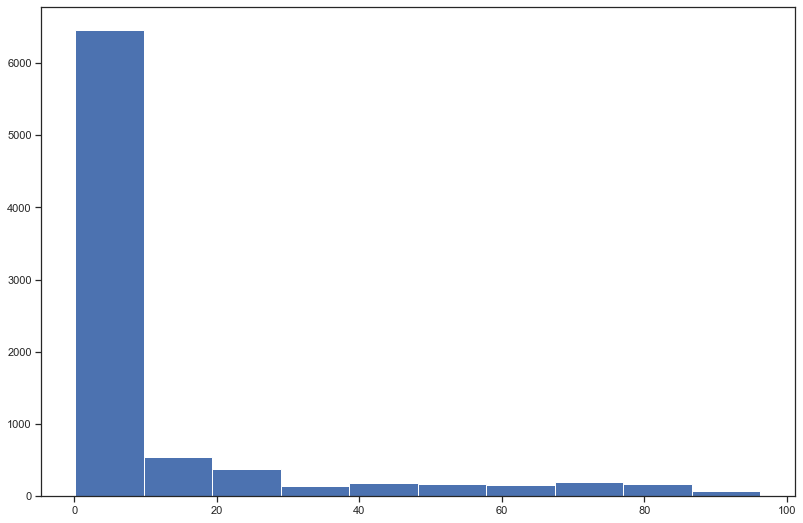

In [102]:
fig,axis=plt.subplots(figsize=(13.5,9))
plt.hist(apple["Adj Close"])

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [29]:
online_rt=pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/Online_Retail.csv", encoding='windows-1252')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

             Quantity
Country              
Netherlands    200128
EIRE           142637
Germany        117448
France         110480
Australia       83653
Sweden          35637
Switzerland     30325
Spain           26824
Japan           25218
Belgium         23152


<AxesSubplot:xlabel='Country'>

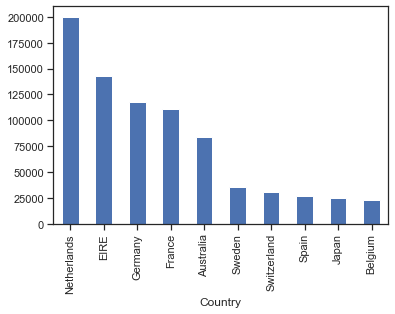

In [44]:
#droping the country united kingdom:- 
p1=online_rt.drop(online_rt[online_rt['Country'] == "United Kingdom"].index)

#creating the pivot table and assenging in ascending order:-
c1=p1.pivot_table(index='Country',values='Quantity',aggfunc=('sum')).sort_values(by='Quantity',ascending=False)
#keeping the upper 10 values
c2=c1.head(10)

print(c2)

#generating the bar chart
c2.Quantity.plot(kind='bar')


### 79.  Exclude negative Quatity entries

In [121]:
online_rt.drop(online_rt[online_rt['UnitPrice'] < 0].index, inplace=True)

online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


          Country      Revenue
0  United Kingdom  8187806.364
1     Netherlands   284661.540
2            EIRE   263276.820


Text(0.5, 1.0, 'EIRE')

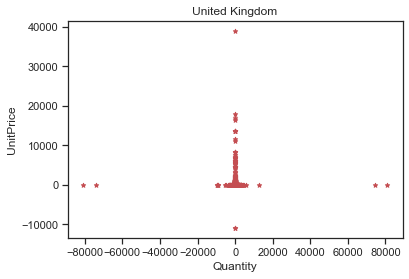

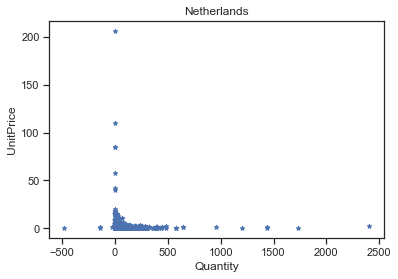

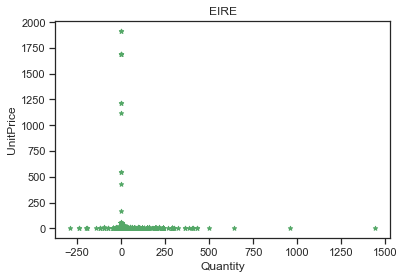

In [145]:
#to generate the new column revenue :- 
online_rt["Revenue"]=online_rt.Quantity*online_rt.UnitPrice

#pivot table and head() id used to identify the top thre countries accoring to revenue
d1= online_rt.pivot_table(index="Country",values= "Revenue",aggfunc='sum').sort_values(by='Revenue',ascending=False).reset_index()
d1.head(3)
print(d1.head(3))

#:- for first country

first_country=online_rt[online_rt.Country == d1.Country[0]]
first_country
first_country.plot(kind = 'scatter', x = 'Quantity', y = 'UnitPrice',marker = '*', c = 'r')
plt.title(d1.Country[0])
#:- for second country
Second_country=online_rt[online_rt.Country == d1.Country[1]]
second_country
second_country.plot(kind = 'scatter', x = 'Quantity', y = 'UnitPrice',marker = '*', c = 'b')
plt.title(d1.Country[1])
#:- for third_country

third_country=online_rt[online_rt.Country == d1.Country[2]]
third_country
third_country.plot(kind = 'scatter', x = 'Quantity', y = 'UnitPrice',marker = '*', c = 'g')
plt.title(d1.Country[2])


## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [46]:
company_data=pd.read_csv("C:/Users/dharmendra.sing1/row_data_for_basic_data_manipulation/FMCG_Company_Data_2019.csv", encoding='windows-1252')
company_data

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

        Total_Revenue
Month                
Apr-19        2890646
Aug-19        5196932
Dec-19        3770512
Feb-19        2864979
Jan-19        3584890
Jul-19        5735655
Jun-19        2857866
Mar-19        4058082
May-19        2997280
Nov-19        6794688
Oct-19        4661916
Sep-19        3060720


Text(0, 0.5, 'Total Revenue')

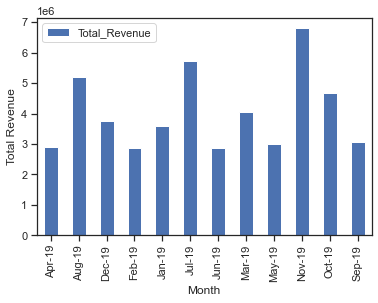

In [147]:
a1=company_data.pivot_table(index='Month',values ='Total_Revenue',aggfunc='sum' )
print(a1)
a1.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Total Revenue")

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

Text(0, 0.5, 'Total_Units')

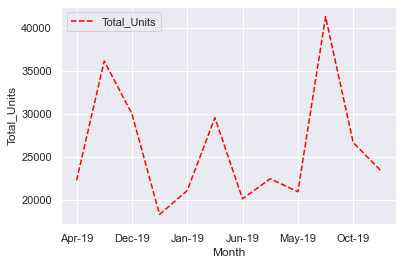

In [187]:
sns.set() 
company_data.pivot_table(index='Month',values ='Total_Units',aggfunc='sum' ).plot(color="red",linestyle = 'dashed')
plt.ylabel("Total_Units")


### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

Text(0, 0.5, 'Sales')

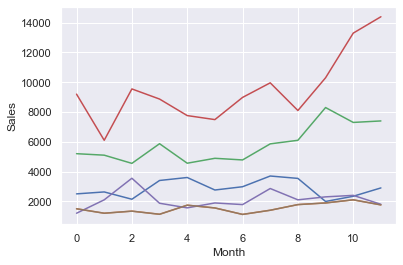

In [202]:
sns.set() 
for col in company_data.columns[[1,2,3,4,5,6]]:
    company_data[col].plot()
company_data.columns[[1,2,3,4,5,6]]
plt.xlabel("Month")
plt.ylabel("Sales")



### 85. Create Bar Chart for soap of all months and Save the chart in folder

         Soap
Month        
Apr-19   8870
Aug-19   9960
Dec-19  14400
Feb-19   6100
Jan-19   9200
Jul-19   8980
Jun-19   7490
Mar-19   9550
May-19   7760
Nov-19  13300
Oct-19  10300
Sep-19   8100


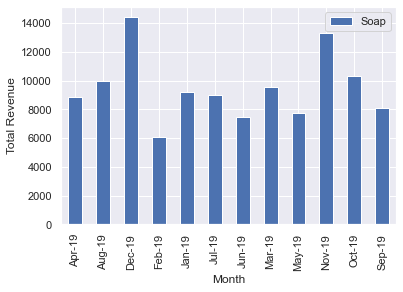

In [207]:
a1=company_data.pivot_table(index='Month',values ='Soap',aggfunc='sum' )
print(a1)
a1.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.savefig('foo.png',dpi=100)


### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

### 87. Create Histogram for Total Revenue

<AxesSubplot:ylabel='Frequency'>

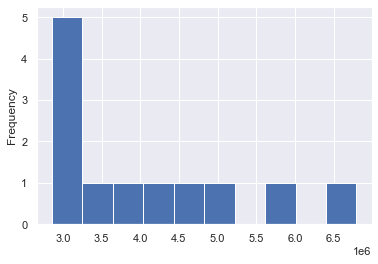

In [213]:
company_data.Total_Revenue.plot(kind='hist')

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

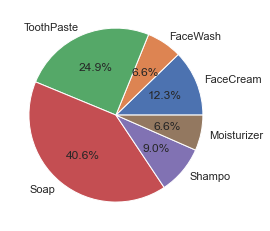

In [223]:
output=company_data.iloc[: ,1:7 ].sum()

plt.pie(output, labels = output.index, autopct = '%.1f%%')
plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

Text(0, 0.5, 'FaceWash sales')

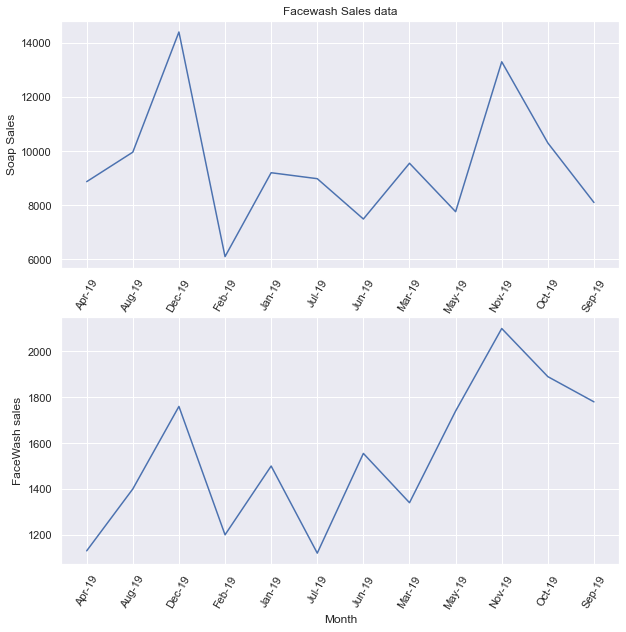

In [342]:
fig,axis=plt.subplots(figsize=(10,10))
#plot 1:
plt.title("Soap Sales data")
plt.subplot(2, 1, 1)
a1=company_data.pivot_table(index='Month',values ='Soap',aggfunc='sum' )
plt.plot(a1)
plt.xlabel("Month")
plt.xticks(rotation=60)
plt.ylabel("Soap Sales")
#plot 2:
plt.title("Facewash Sales data")
plt.subplot(2, 1, 2)
a2=company_data.pivot_table(index='Month',values ='FaceWash',aggfunc='sum' )
plt.plot(a2)
plt.xlabel("Month")
plt.xticks(rotation=60)
plt.ylabel("FaceWash sales")


### 90. Create Box Plot for Total Profit variable

<AxesSubplot:>

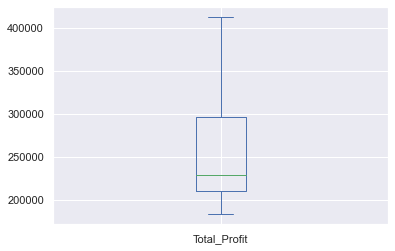

In [343]:
company_data.Total_Profit.plot(kind='box')